In [1]:
from cassava import main, get_disease_map, N_CLASSES

disease_map = get_disease_map()

results, valid_dataset = main()

2.2.0
DEV MODE: True
{0: 'Cassava Bacterial Blight (CBB)', 1: 'Cassava Brown Streak Disease (CBSD)', 2: 'Cassava Green Mottle (CGM)', 3: 'Cassava Mosaic Disease (CMD)', 4: 'Healthy'}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 506, 506, 32)      4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 64)      100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       401536    
_________________________________________________________________
max_p

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

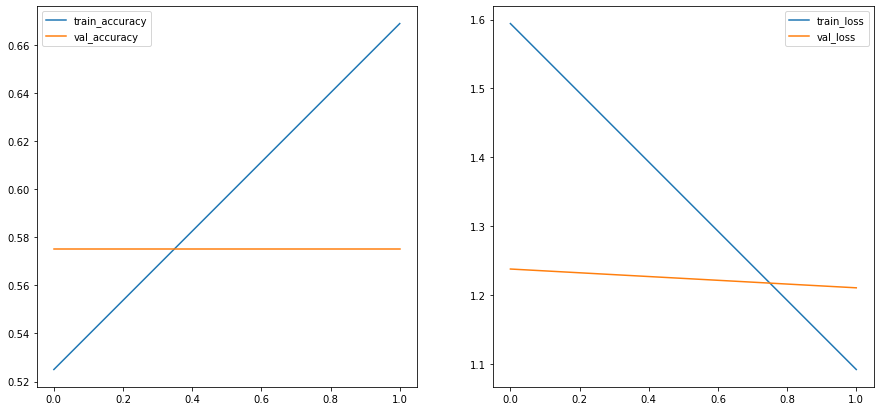

In [3]:
accuracy_history = pd.DataFrame(data={"train_accuracy": results.history["accuracy"], "val_accuracy": results.history["val_accuracy"]}, index=results.epoch)
loss_history = pd.DataFrame(data={"train_loss": results.history["loss"], "val_loss": results.history["val_loss"]}, index=results.epoch)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.lineplot(data=accuracy_history, ax=ax[0], dashes=False)
sns.lineplot(data=loss_history, ax=ax[1], dashes=False)
fig.show()


In [10]:
import numpy as np

y = np.array(valid_dataset.labels)
predictions = results.model.predict(valid_dataset)
y_pred = np.argmax(predictions, axis=-1)

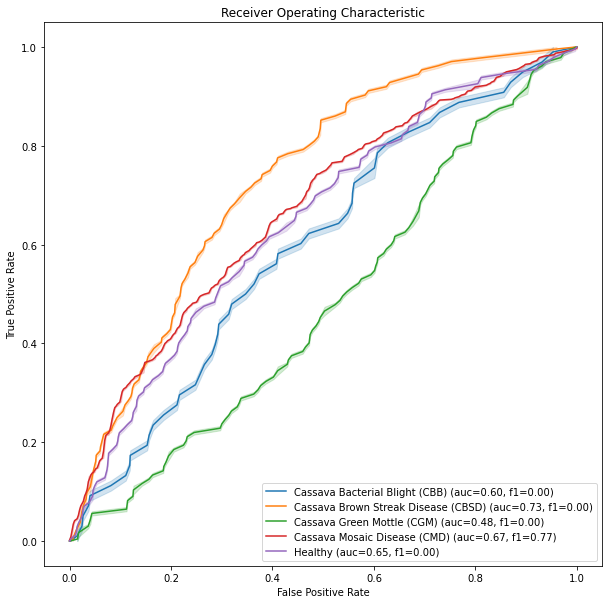

In [11]:
from sklearn.metrics import roc_curve, auc, f1_score
import numpy as np

fig_roc, ax_roc = plt.subplots(figsize=(10, 10))

ax_roc.set_title(f"Receiver Operating Characteristic")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")

for class_id in range(N_CLASSES):
    y_cur = (y == class_id).reshape(-1)
    pred_cur = predictions[:, class_id].reshape(-1)

    fpr, tpr, thresh = roc_curve(y_cur, pred_cur)
    roc_auc = auc(fpr, tpr)

    f1 = f1_score(y_cur, y_pred == class_id)

    sns.lineplot(x=fpr, y=tpr, ax=ax_roc, label=f"{disease_map[class_id]} (auc={roc_auc:.2f}, f1={f1:.2f})")

fig_roc.show()

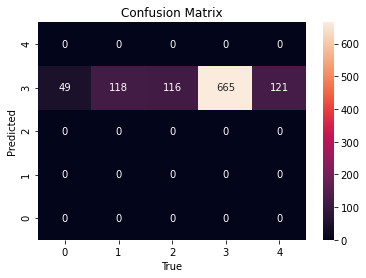

In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = np.transpose(confusion_matrix(y, y_pred, labels=list(disease_map.keys())))

fig_conf, ax_conf = plt.subplots()

ax_conf.set_title("Confusion Matrix")

sns.heatmap(data=conf_matrix, annot=True, fmt=".0f", ax=ax_conf)

ax_conf.invert_yaxis()

ax_conf.set_xlabel("True")
ax_conf.set_ylabel("Predicted")

fig_conf.show()

In [13]:
from sklearn.metrics import f1_score

print("F1:", f1_score(y, y_pred, average="macro"))
print("Weighted F1:", f1_score(y, y_pred, average="weighted"))

F1: 0.15340253748558247
Weighted F1: 0.4771407269780746
